In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### data from 

In [52]:
df = pd.read_csv('data\\states-daily_3_26.csv')
df.head()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200325,AK,42.0,1649.0,NaN,1.0,1.0,1691,2020-03-25T20:00:00Z,1691,1.0,1.0,663.0,6.0,669.0
1,20200325,AL,283.0,2529.0,NaN,NaN,0.0,2812,2020-03-25T20:00:00Z,2812,0.0,0.0,423.0,68.0,491.0
2,20200325,AR,280.0,1437.0,0.0,22.0,2.0,1717,2020-03-25T20:00:00Z,1717,2.0,0.0,490.0,62.0,552.0
3,20200325,AS,0.0,NaN,NaN,NaN,0.0,0,2020-03-25T20:00:00Z,0,0.0,0.0,0.0,0.0,0.0
4,20200325,AZ,450.0,323.0,53.0,8.0,6.0,826,2020-03-25T20:00:00Z,773,1.0,0.0,10.0,93.0,103.0


In [55]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head(2)

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-03-25,AK,42.0,1649.0,NaN,1.0,1.0,1691,2020-03-25T20:00:00Z,1691,1.0,1.0,663.0,6.0,669.0
1,2020-03-25,AL,283.0,2529.0,NaN,NaN,0.0,2812,2020-03-25T20:00:00Z,2812,0.0,0.0,423.0,68.0,491.0


In [53]:
# df.index = df['date']
# df = df.drop('date', axis=1)
# df.head()

### perfect example of literal to string back to literal conversion... what if i want to check a different set of states?

In [56]:
df_states = df[(df['state']=='NY')|(df['state']=='FL')|(df['state']=='DC')|(df['state']=='NJ')|(df['state']=='WA')|(df['state']=='CA')|]
df_states.head()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-03-25,CA,2102.0,13452.0,12100.0,NaN,40.0,27654,2020-03-25T20:00:00Z,15554,0.0,0.0,0.0,0.0,0.0
8,2020-03-25,DC,183.0,1423.0,3.0,NaN,2.0,1609,2020-03-25T20:00:00Z,1606,0.0,0.0,228.0,46.0,274.0
10,2020-03-25,FL,1682.0,15374.0,1233.0,316.0,22.0,18289,2020-03-25T20:00:00Z,17056,4.0,57.0,2247.0,270.0,2517.0
34,2020-03-25,NJ,4402.0,10452.0,NaN,NaN,62.0,14854,2020-03-25T20:00:00Z,14854,18.0,0.0,2127.0,727.0,2854.0
37,2020-03-25,NY,30811.0,72668.0,NaN,3805.0,285.0,103479,2020-03-25T20:00:00Z,103479,75.0,571.0,7063.0,5146.0,12209.0


In [60]:
df_states_hospitalized = df_states[['date', 'state', 'hospitalized']]
df_states_hospitalized.head()

,date,state,hospitalized
5,2020-03-25,CA,NaN
8,2020-03-25,DC,NaN
10,2020-03-25,FL,316.0
34,2020-03-25,NJ,NaN
37,2020-03-25,NY,3805.0


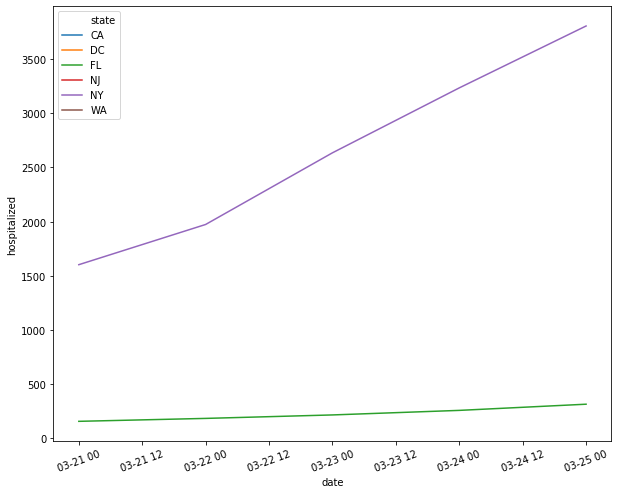

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(ax = ax, data=df_states_hospitalized, x='date', y='hospitalized', hue='state')
plt.xticks(rotation=20)
plt.show()

### Hospitalized Histograms

In [33]:
df_325 = df[df.index=='2020-03-25']
df_324 = df[df.index=='2020-03-24']
df_323 = df[df.index=='2020-03-23']
df_322 = df[df.index=='2020-03-22']
df_321 = df[df.index=='2020-03-21']
df_320 = df[df.index=='2020-03-20']

In [92]:
def metric_hist(metric):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(df_325[metric], bins=15, label='3/25', alpha=0.7)
    ax.hist(df_324[metric], bins=15, label='3/24', alpha=0.7)
    ax.hist(df_323[metric], bins=15, label='3/23', alpha=0.7)
    ax.hist(df_322[metric], bins=15, label='3/22', alpha=0.7)
    ax.hist(df_321[metric], bins=15, label='3/21', alpha=0.7)
    #plt.hist(df_320['hospitalized'], bins=15, label='3/20')
    ax.legend()
    plt.show()

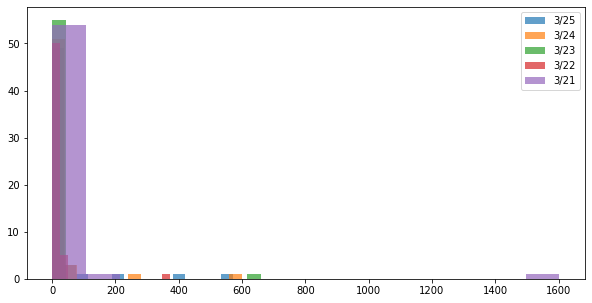

In [93]:
metric_hist('hospitalizedIncrease')

### Cumulative Cases

In [67]:
df_states_positive = df_states[['date', 'state', 'positive']]
df_states_positive.head()

,date,state,positive
5,2020-03-25,CA,2102.0
8,2020-03-25,DC,183.0
10,2020-03-25,FL,1682.0
34,2020-03-25,NJ,4402.0
37,2020-03-25,NY,30811.0


In [99]:
df[df['state']=='FL']

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
10,2020-03-25,FL,1682.0,15374.0,1233.0,316.0,22.0,18289,2020-03-25T20:00:00Z,17056,4.0,57.0,2247.0,270.0,2517.0
66,2020-03-24,FL,1412.0,13127.0,1008.0,259.0,18.0,15547,2020-03-24T20:00:00Z,14539,4.0,42.0,2064.0,241.0,2305.0
122,2020-03-23,FL,1171.0,11063.0,860.0,217.0,14.0,13094,2020-03-23T20:00:00Z,12234,1.0,32.0,3073.0,341.0,3414.0
178,2020-03-22,FL,830.0,7990.0,963.0,185.0,13.0,9783,2020-03-22T20:00:00Z,8820,1.0,27.0,1411.0,172.0,1583.0
234,2020-03-21,FL,658.0,6579.0,1002.0,158.0,12.0,8239,2020-03-21T20:00:00Z,7237,2.0,158.0,4709.0,138.0,4847.0
290,2020-03-20,FL,520.0,1870.0,1026.0,NaN,10.0,3416,2020-03-20T20:00:00Z,2390,2.0,0.0,337.0,130.0,467.0
346,2020-03-19,FL,390.0,1533.0,1019.0,NaN,8.0,2942,2020-03-19T20:00:00Z,1923,1.0,0.0,308.0,76.0,384.0
402,2020-03-18,FL,314.0,1225.0,954.0,NaN,7.0,2493,2020-03-18T20:00:00Z,1539,1.0,0.0,285.0,128.0,413.0
458,2020-03-17,FL,186.0,940.0,872.0,NaN,6.0,1998,2020-03-17T20:00:00Z,1126,2.0,0.0,256.0,45.0,301.0
514,2020-03-16,FL,141.0,684.0,514.0,NaN,4.0,1339,2020-03-16T20:00:00Z,825,0.0,0.0,6.0,25.0,31.0


In [106]:
# fig, ax = plt.subplots(figsize=(10,5))
# sns.lineplot(ax = ax, data=df_states_hospitalized, x='date', y='positive', hue='state')
# plt.xticks(rotation=20)
# plt.show()

In [109]:
def metric_trender(state, metric):
    temp_df = df[df['state']==state]
    temp_df = temp_df[['date', 'state', metric]]
    fig, ax1 = plt.subplots(figsize=(10,5))
    sns.lineplot(ax = ax1, data=temp_df, x='date', y=metric, hue='state')
    ax1.scatter(temp_df['date'], temp_df[metric])
    plt.xticks(rotation=20)
    plt.show()

# Florida

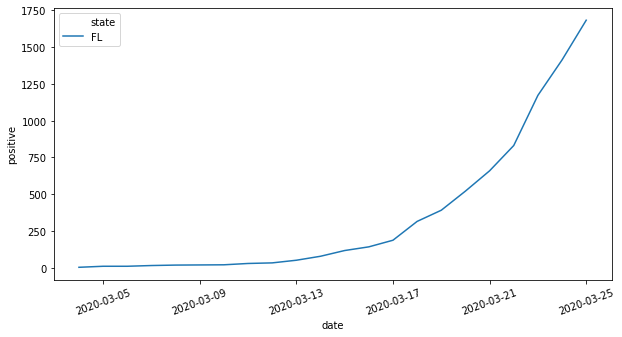

In [82]:
metric_trender(state='FL', metric='positive')

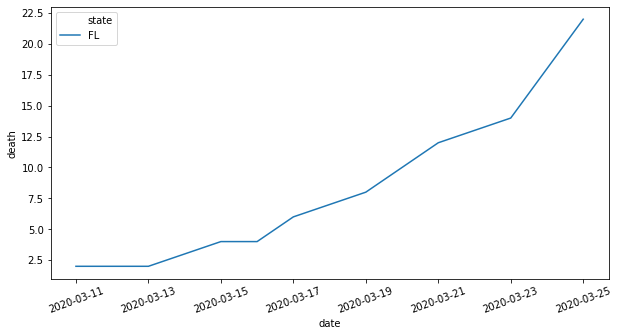

In [83]:
metric_trender(state='FL', metric='death')

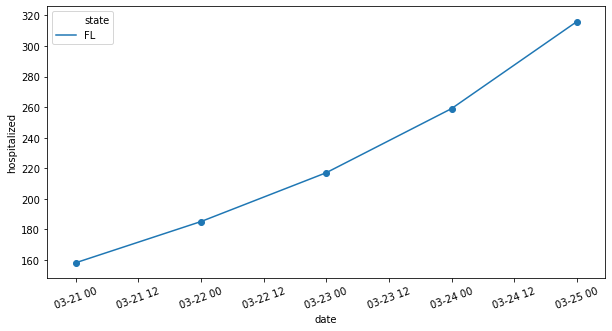

In [110]:
metric_trender(state='FL', metric='hospitalized')

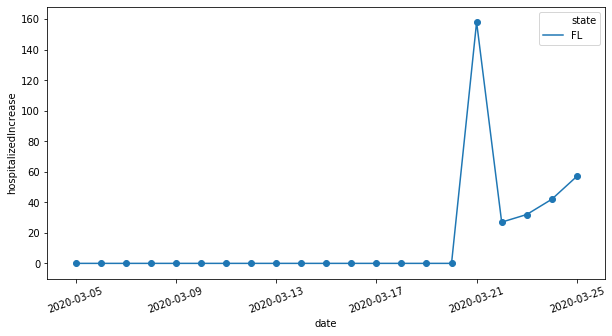

In [114]:
metric_trender(state='FL', metric='hospitalizedIncrease')

# New York

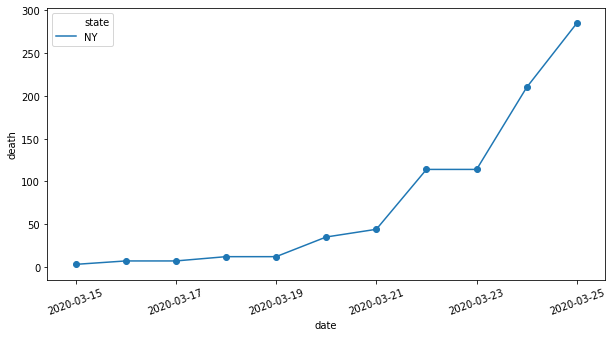

In [111]:
metric_trender(state='NY', metric='death')

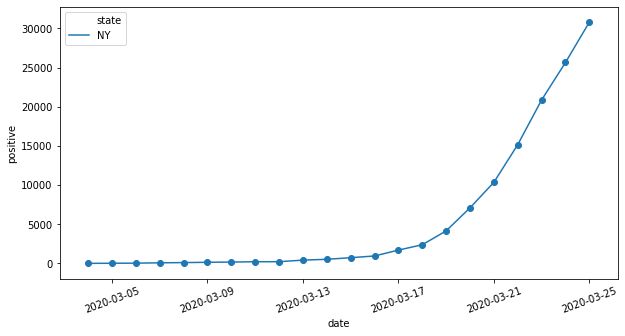

In [112]:
metric_trender(state='NY', metric='positive')

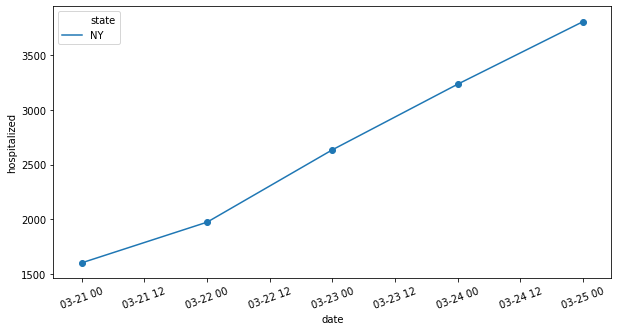

In [113]:
metric_trender(state='NY', metric='hospitalized')

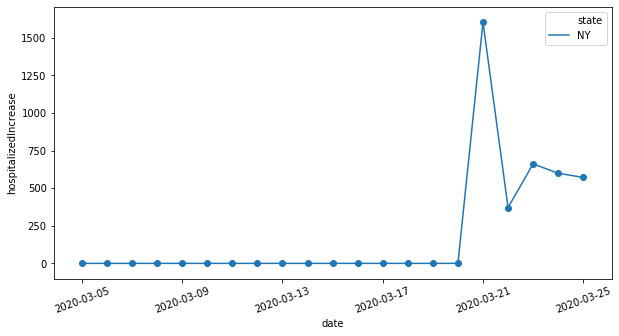

In [115]:
metric_trender(state='NY', metric='hospitalizedIncrease')

# Washington

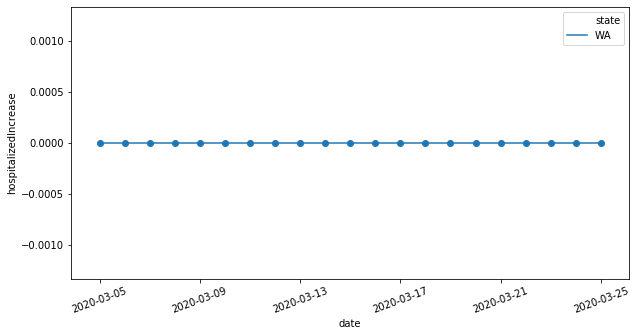

In [116]:
metric_trender(state='WA', metric='hospitalizedIncrease')

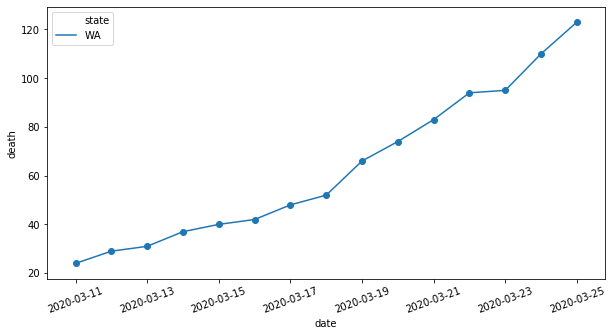

In [118]:
metric_trender(state='WA', metric='death')

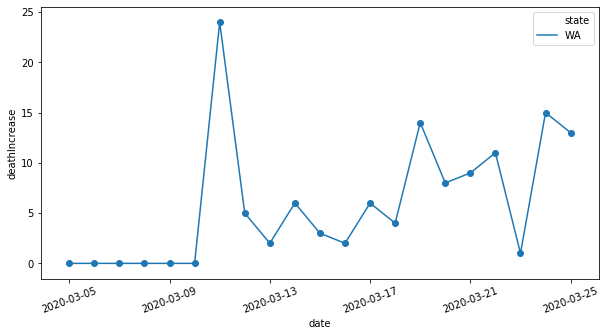

In [119]:
metric_trender(state='WA', metric='deathIncrease')

### California

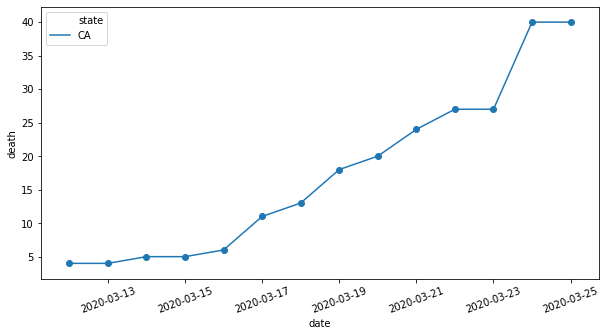

In [121]:
metric_trender(state='CA', metric='death')

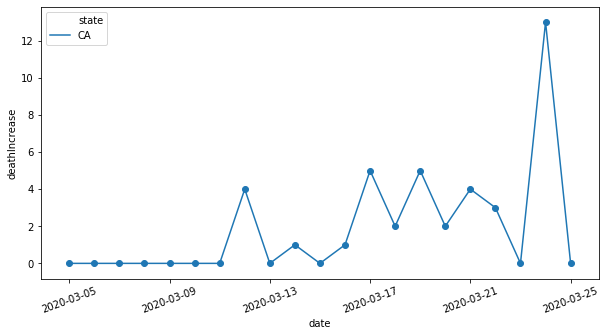

In [123]:
metric_trender(state='CA', metric='deathIncrease')

### Cumulative Death